In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import glob
import re
import io
import os
import sys 
sys.path.append('..')
from brian2 import *
import brian_utils.postproc as bup
import pickle
import random

In [10]:
with open(f'../data/damgo_ramp_pkls/pcon_0.01/seed1-damgo_ramp_hyp8_vars.pkl','rb') as fid0:
    random_gl_data = pickle.load(fid0)
random_gl_rate = random_gl_data['ratemonitor']

with open(f'targeted_damgo_ramp_pkls/damgo_to_low_gl_ramp_pkls/seed1-damgo-low_gl_ramp_vars.pkl','rb') as fid1:
    low_gl_data = pickle.load(fid1)
low_gl_rate = low_gl_data['ratemonitor']
    
with open(f'targeted_damgo_ramp_pkls/damgo_to_high_gl_ramp_pkls/seed1-damgo-high_gl_ramp_vars.pkl','rb') as fid2:
    high_gl_data = pickle.load(fid2)
high_gl_rate = high_gl_data['ratemonitor']

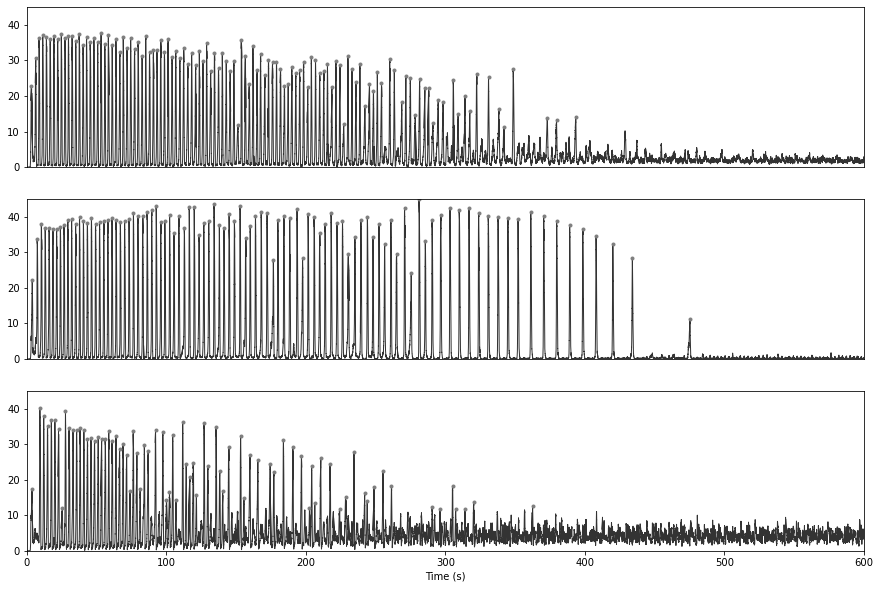

In [11]:
f = plt.figure(figsize=(15,10))
f.tight_layout()
g = f.add_gridspec(3, 1)

height = 4
prominence = 10
binsize = 25 * ms

smoothed_pop_rate = bup.smooth_saved_rate(random_gl_rate, binsize)
burst_stats = bup.pop_burst_stats(random_gl_rate['t'], smoothed_pop_rate, height = height, prominence = prominence)
ax = f.add_subplot(g[0,0])
ax.set_xticks([])
ax.set_xlim(0,600)
ax.set_ylim(0,45)
ax.plot(random_gl_rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.8)
ax.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "tab:gray")
#ax.set_xlabel('Time (30 s)')
#ax.set_ylabel('FR\n(Hz/cell)')

smoothed_pop_rate = bup.smooth_saved_rate(low_gl_rate, binsize)
burst_stats = bup.pop_burst_stats(low_gl_rate['t'], smoothed_pop_rate, height = height, prominence = prominence)
ax = f.add_subplot(g[1,0])
ax.set_xticks([])
ax.set_xlim(0,600)
ax.set_ylim(0,45)
ax.plot(low_gl_rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.8)
ax.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "tab:gray")
#ax.set_xlabel('Time (30 s)')
#ax.set_ylabel('FR\n(Hz/cell)')

smoothed_pop_rate = bup.smooth_saved_rate(high_gl_rate, binsize)
burst_stats = bup.pop_burst_stats(high_gl_rate['t'], smoothed_pop_rate, height = height, prominence = prominence)
ax = f.add_subplot(g[2,0])
#ax.set_xticks([])
ax.set_xlim(0,600)
ax.set_ylim(0,45)
ax.plot(high_gl_rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.8)
ax.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "tab:gray")
ax.set_xlabel('Time (s)')
#ax.set_ylabel('FR\n(Hz/cell)')
plt.savefig('targeted_damgo_ramp_traces.pdf')

In [12]:
random_gl_ramp_thresholds = []
for i in range(1,41):
    with open(f'../data/damgo_ramp_pkls/pcon_0.01/seed1-damgo_ramp_hyp8_vars.pkl','rb') as fid1:
        random_gl_data = pickle.load(fid1)
    random_gl_rate = random_gl_data['ratemonitor']
    binsize = 25 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(random_gl_rate, binsize)
    burst_stats = bup.pop_burst_stats(random_gl_rate['t'], smoothed_pop_rate, height = 4, prominence = 10)
    
    # Compute network shutdown dosage using firing rate thresholds
    peaks = smoothed_pop_rate[burst_stats['Peak Samples']] / Hz        
    damgo_conc = random_gl_data['vm_opioid']/pA

    # For more robustness, we get the dosage from the last burst at multiple thresholds (10-15 Hz) and take the average 
    i_opioid_peak10 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 10].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak11 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 11].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak12 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 12].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak13 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 13].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak14 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 14].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak15 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 15].iloc[-1]['Offset Times'] / 3)]
    shutdown_val = (i_opioid_peak10 + i_opioid_peak11 + i_opioid_peak12 + i_opioid_peak13 + i_opioid_peak14 + i_opioid_peak15) / 6
    
    random_gl_ramp_thresholds.append(shutdown_val)

low_gl_ramp_thresholds = []
for i in range(1,41):
    with open(f'targeted_damgo_ramp_pkls/damgo_to_low_gl_ramp_pkls/seed{i}-damgo-low_gl_ramp_vars.pkl','rb') as fid1:
        low_gl_data = pickle.load(fid1)
    low_gl_rate = low_gl_data['ratemonitor']
    binsize = 25 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(low_gl_rate, binsize)
    burst_stats = bup.pop_burst_stats(low_gl_rate['t'], smoothed_pop_rate, height = 4, prominence = 10)
    
    # Compute network shutdown dosage using firing rate thresholds
    peaks = smoothed_pop_rate[burst_stats['Peak Samples']] / Hz        
    damgo_conc = low_gl_data['vm_opioid']/pA

    # For more robustness, we get the dosage from the last burst at multiple thresholds (10-15 Hz) and take the average 
    i_opioid_peak10 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 10].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak11 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 11].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak12 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 12].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak13 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 13].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak14 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 14].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak15 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 15].iloc[-1]['Offset Times'] / 3)]
    shutdown_val = (i_opioid_peak10 + i_opioid_peak11 + i_opioid_peak12 + i_opioid_peak13 + i_opioid_peak14 + i_opioid_peak15) / 6
    
    low_gl_ramp_thresholds.append(shutdown_val)
    
high_gl_ramp_thresholds = []
for i in range(1,41):
    with open(f'targeted_damgo_ramp_pkls/damgo_to_high_gl_ramp_pkls/seed{i}-damgo-high_gl_ramp_vars.pkl','rb') as fid1:
        high_gl_data = pickle.load(fid1)
    high_gl_rate = high_gl_data['ratemonitor']
    binsize = 25 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(high_gl_rate, binsize)
    burst_stats = bup.pop_burst_stats(high_gl_rate['t'], smoothed_pop_rate, height = 4, prominence = 10)
    
    # Compute network shutdown dosage using firing rate thresholds
    peaks = smoothed_pop_rate[burst_stats['Peak Samples']] / Hz        
    damgo_conc = high_gl_data['vm_opioid']/pA

    # For more robustness, we get the dosage from the last burst at multiple thresholds (10-15 Hz) and take the average 
    i_opioid_peak10 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 10].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak11 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 11].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak12 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 12].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak13 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 13].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak14 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 14].iloc[-1]['Offset Times'] / 3)]
    i_opioid_peak15 = damgo_conc[int(burst_stats[burst_stats['Peaks'] >= 15].iloc[-1]['Offset Times'] / 3)]
    shutdown_val = (i_opioid_peak10 + i_opioid_peak11 + i_opioid_peak12 + i_opioid_peak13 + i_opioid_peak14 + i_opioid_peak15) / 6
    
    high_gl_ramp_thresholds.append(shutdown_val)

In [13]:
df = pd.read_csv('thresholds.csv')

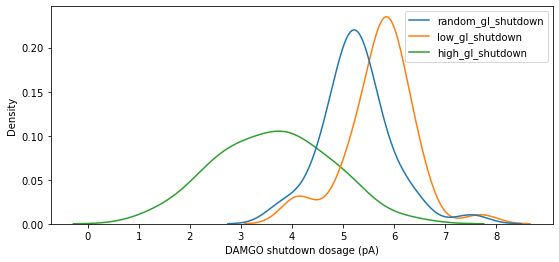

In [16]:
plt.figure(figsize=(9,4))
sns.kdeplot(data=df)
plt.xlabel('DAMGO shutdown dosage (pA)')
plt.xticks(np.arange(0,9))
plt.savefig('shutdown_kde.pdf')